## Load and Prepare the Data


In [13]:
import pandas as pd

# Load your CSV file
df = pd.read_csv('kristalball_dataset.csv')

# Preview the first few rows
print(df.head())

  Date Time Served       Bar Name Alcohol Type      Brand Name  \
0   1/1/2023 19:35    Smith's Bar          Rum  Captain Morgan   
1   1/1/2023 10:07    Smith's Bar         Wine     Yellow Tail   
2   1/1/2023 11:26  Johnson's Bar        Vodka      Grey Goose   
3   1/1/2023 13:53  Johnson's Bar         Beer           Coors   
4   1/1/2023 22:28  Johnson's Bar         Wine     Yellow Tail   

   Opening Balance (ml)  Purchase (ml)  Consumed (ml)  Closing Balance (ml)  
0               2555.04        1824.84            0.0               4379.88  
1               1344.37           0.00            0.0               1344.37  
2               1034.28           0.00            0.0               1034.28  
3               2194.53           0.00            0.0               2194.53  
4               1020.90           0.00            0.0               1020.90  


In [14]:
df

,Date Time Served,Bar Name,Alcohol Type,Brand Name,Opening Balance (ml),Purchase (ml),Consumed (ml),Closing Balance (ml)
0,1/1/2023 19:35,Smith's Bar,Rum,Captain Morgan,2.555040e+03,1824.84,0.00,4379.88
1,1/1/2023 10:07,Smith's Bar,Wine,Yellow Tail,1.344370e+03,0.00,0.00,1344.37
2,1/1/2023 11:26,Johnson's Bar,Vodka,Grey Goose,1.034280e+03,0.00,0.00,1034.28
3,1/1/2023 13:53,Johnson's Bar,Beer,Coors,2.194530e+03,0.00,0.00,2194.53
4,1/1/2023 22:28,Johnson's Bar,Wine,Yellow Tail,1.020900e+03,0.00,0.00,1020.90
...,...,...,...,...,...,...,...,...
6570,1/1/2024 21:03,Anderson's Bar,Beer,Coors,2.467080e+03,0.00,321.06,2146.02
6571,1/1/2024 21:15,Anderson's Bar,Rum,Malibu,8.530000e-14,1743.64,175.05,1568.59
6572,1/1/2024 18:34,Anderson's Bar,Whiskey,Jack Daniels,4.192660e+03,0.00,197.60,3995.06
6573,1/1/2024 22:46,Thomas's Bar,Vodka,Absolut,2.424950e+03,0.00,128.52,2296.43


## List all unique names, brands, types

In [15]:
# List all unique bar names
print("Unique Bar Names:")
print(df['Bar Name'].unique())

# List all unique alcohol types
print("\nUnique Alcohol Types:")
print(df['Alcohol Type'].unique())

# List all unique brand names
print("\nUnique Brand Names:")
print(df['Brand Name'].unique())


Unique Bar Names:
["Smith's Bar" "Johnson's Bar" "Brown's Bar" "Taylor's Bar"
 "Anderson's Bar" "Thomas's Bar"]

Unique Alcohol Types:
['Rum' 'Wine' 'Vodka' 'Beer' 'Whiskey']

Unique Brand Names:
['Captain Morgan' 'Yellow Tail' 'Grey Goose' 'Coors' 'Jim Beam' 'Absolut'
 'Jack Daniels' 'Sutter Home' 'Miller' 'Bacardi' 'Malibu' 'Jameson'
 'Smirnoff' 'Budweiser' 'Heineken' 'Barefoot']


In [16]:
# Count of records per bar
print("\nBar Name Counts:")
print(df['Bar Name'].value_counts())

# Count per alcohol type
print("\nAlcohol Type Counts:")
print(df['Alcohol Type'].value_counts())

# Count per brand
print("\nBrand Name Counts:")
print(df['Brand Name'].value_counts())



Bar Name Counts:
Bar Name
Johnson's Bar     1106
Anderson's Bar    1102
Thomas's Bar      1101
Brown's Bar       1100
Taylor's Bar      1088
Smith's Bar       1078
Name: count, dtype: int64

Alcohol Type Counts:
Alcohol Type
Vodka      1331
Whiskey    1316
Wine       1316
Rum        1310
Beer       1302
Name: count, dtype: int64

Brand Name Counts:
Brand Name
Yellow Tail       479
Captain Morgan    471
Grey Goose        465
Jim Beam          455
Smirnoff          434
Jack Daniels      433
Absolut           432
Jameson           428
Malibu            425
Barefoot          424
Bacardi           414
Sutter Home       413
Miller            363
Coors             325
Heineken          314
Budweiser         300
Name: count, dtype: int64


## Consumption Patterns by Category

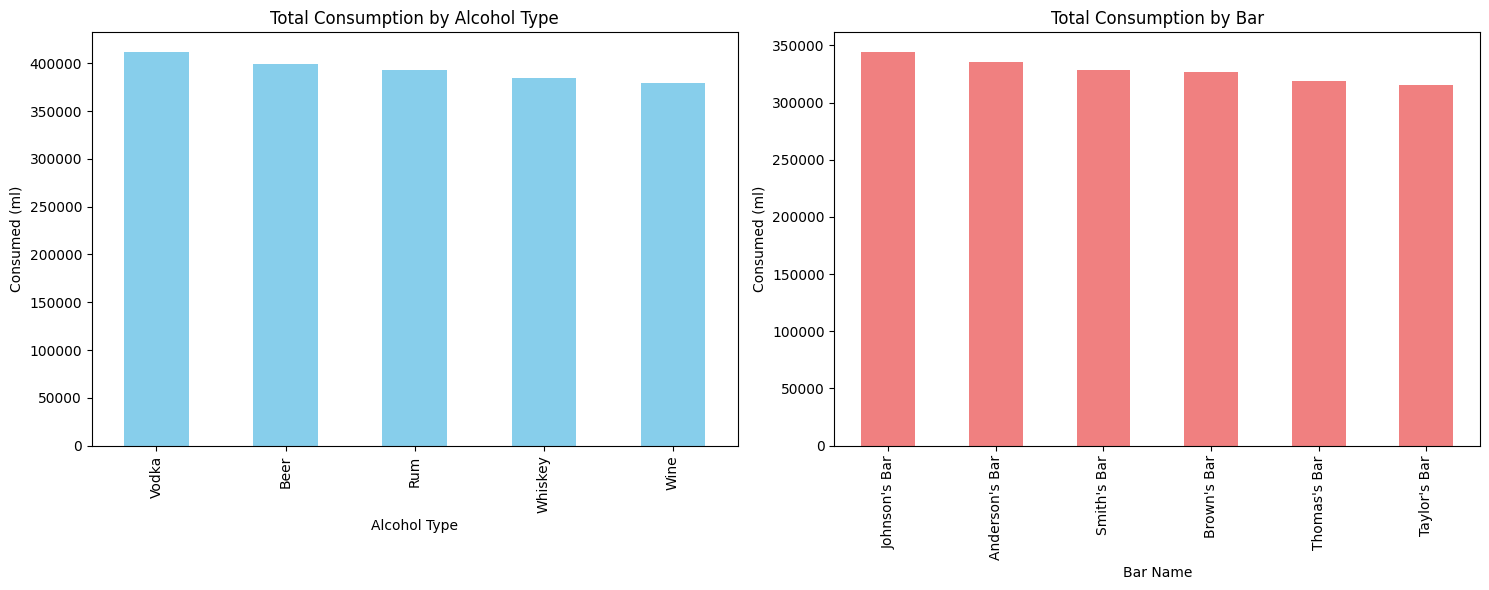

In [17]:
import matplotlib.pyplot as plt


# Analyze consumption patterns
consumption_by_type = df.groupby('Alcohol Type')['Consumed (ml)'].sum().sort_values(ascending=False)
consumption_by_bar = df.groupby('Bar Name')['Consumed (ml)'].sum().sort_values(ascending=False)

# Create visualizations
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Consumption by alcohol type
consumption_by_type.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Total Consumption by Alcohol Type')
axes[0].set_ylabel('Consumed (ml)')

# Consumption by bar
consumption_by_bar.plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Total Consumption by Bar')
axes[1].set_ylabel('Consumed (ml)')

plt.tight_layout()
plt.show()

## Data Cleaning and Preparation

###  Convert 'Date Time Served' to datetime format

In [18]:

# Convert 'Date Time Served' to datetime format
df['Date Time Served'] = pd.to_datetime(df['Date Time Served'])

# Sort data by date to keep it time-ordered
df = df.sort_values('Date Time Served')

# If Consumed (ml) is missing or zero, calculate it
df['Calculated Consumed (ml)'] = df['Opening Balance (ml)'] + df['Purchase (ml)'] - df['Closing Balance (ml)']

# If original 'Consumed (ml)' is 0, replace it with calculated value
df['Consumed (ml)'] = df.apply(
    lambda row: row['Calculated Consumed (ml)'] if row['Consumed (ml)'] == 0 else row['Consumed (ml)'],
    axis=1
)

# Drop the helper column
df.drop(columns=['Calculated Consumed (ml)'], inplace=True)

# Check for any missing values
print(df.isnull().sum())


Date Time Served        0
Bar Name                0
Alcohol Type            0
Brand Name              0
Opening Balance (ml)    0
Purchase (ml)           0
Consumed (ml)           0
Closing Balance (ml)    0
dtype: int64


- no missing values

## After Data Cleaning

In [19]:
# View cleaned data
print(df.head())

      Date Time Served        Bar Name Alcohol Type   Brand Name  \
1  2023-01-01 10:07:00     Smith's Bar         Wine  Yellow Tail   
5  2023-01-01 10:28:00     Brown's Bar        Vodka   Grey Goose   
2  2023-01-01 11:26:00   Johnson's Bar        Vodka   Grey Goose   
13 2023-01-01 11:32:00  Anderson's Bar      Whiskey     Jim Beam   
3  2023-01-01 13:53:00   Johnson's Bar         Beer        Coors   

    Opening Balance (ml)  Purchase (ml)  Consumed (ml)  Closing Balance (ml)  
1                1344.37            0.0            0.0               1344.37  
5                2560.44            0.0            0.0               2560.44  
2                1034.28            0.0            0.0               1034.28  
13                872.08            0.0            0.0                872.08  
3                2194.53            0.0            0.0               2194.53  


In [20]:
df

,Date Time Served,Bar Name,Alcohol Type,Brand Name,Opening Balance (ml),Purchase (ml),Consumed (ml),Closing Balance (ml)
1,2023-01-01 10:07:00,Smith's Bar,Wine,Yellow Tail,1.344370e+03,0.00,0.00,1344.37
5,2023-01-01 10:28:00,Brown's Bar,Vodka,Grey Goose,2.560440e+03,0.00,0.00,2560.44
2,2023-01-01 11:26:00,Johnson's Bar,Vodka,Grey Goose,1.034280e+03,0.00,0.00,1034.28
13,2023-01-01 11:32:00,Anderson's Bar,Whiskey,Jim Beam,8.720800e+02,0.00,0.00,872.08
3,2023-01-01 13:53:00,Johnson's Bar,Beer,Coors,2.194530e+03,0.00,0.00,2194.53
...,...,...,...,...,...,...,...,...
6569,2024-01-01 19:36:00,Taylor's Bar,Rum,Captain Morgan,5.870840e+03,1955.11,440.76,7385.19
6570,2024-01-01 21:03:00,Anderson's Bar,Beer,Coors,2.467080e+03,0.00,321.06,2146.02
6571,2024-01-01 21:15:00,Anderson's Bar,Rum,Malibu,8.530000e-14,1743.64,175.05,1568.59
6574,2024-01-01 21:26:00,Thomas's Bar,Rum,Bacardi,1.778360e+03,1195.45,572.60,2401.21


## Grouping the data by

- Bar Name
- Brand Name
- Date time served

In [21]:
# Ensure datetime is the index for resampling
df.set_index('Date Time Served', inplace=True)

# Group by Bar and Brand, then resample weekly and sum the consumed volume
weekly_consumption = df.groupby(['Bar Name', 'Alcohol Type','Brand Name']).resample('W')['Consumed (ml)'].sum().reset_index()

# Preview the result
print(weekly_consumption.head())


         Bar Name Alcohol Type Brand Name Date Time Served  Consumed (ml)
0  Anderson's Bar         Beer  Budweiser       2023-01-15         159.07
1  Anderson's Bar         Beer  Budweiser       2023-01-22         541.71
2  Anderson's Bar         Beer  Budweiser       2023-01-29         238.29
3  Anderson's Bar         Beer  Budweiser       2023-02-05         225.56
4  Anderson's Bar         Beer  Budweiser       2023-02-12         482.17


### resampled weekly wise

In [22]:
weekly_consumption

,Bar Name,Alcohol Type,Brand Name,Date Time Served,Consumed (ml)
0,Anderson's Bar,Beer,Budweiser,2023-01-15,159.07
1,Anderson's Bar,Beer,Budweiser,2023-01-22,541.71
2,Anderson's Bar,Beer,Budweiser,2023-01-29,238.29
3,Anderson's Bar,Beer,Budweiser,2023-02-05,225.56
4,Anderson's Bar,Beer,Budweiser,2023-02-12,482.17
...,...,...,...,...,...
4973,Thomas's Bar,Wine,Yellow Tail,2023-12-03,1064.44
4974,Thomas's Bar,Wine,Yellow Tail,2023-12-10,528.90
4975,Thomas's Bar,Wine,Yellow Tail,2023-12-17,506.51
4976,Thomas's Bar,Wine,Yellow Tail,2023-12-24,365.93


## Daily, Weekly, Monthly Consumption Trends Visualization

In [23]:
!pip install plotly ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.2 MB/s eta 0:00:00


In [24]:
!pip install ipywidgets
from google.colab import output
output.enable_custom_widget_manager()


In [25]:
import pandas as pd
import plotly.graph_objs as go
import ipywidgets as widgets
from IPython.display import display, clear_output

# STEP 1: Get unique values
bar_names = df['Bar Name'].unique()
alcohol_types = df['Alcohol Type'].unique()

# STEP 2: Dropdowns
bar_dropdown = widgets.Dropdown(
    options=bar_names,
    description='Bar:',
    layout=widgets.Layout(width='50%')
)

alcohol_dropdown = widgets.Dropdown(
    options=alcohol_types,
    description='Type:',
    layout=widgets.Layout(width='50%')
)

brand_dropdown = widgets.Dropdown(
    options=[],  # we’ll populate this based on alcohol type
    description='Brand:',
    layout=widgets.Layout(width='50%')
)

# STEP 3: Update brand dropdown based on alcohol type
def update_brand_options(*args):
    selected_type = alcohol_dropdown.value
    matching_brands = df[df['Alcohol Type'] == selected_type]['Brand Name'].unique()
    brand_dropdown.options = matching_brands

alcohol_dropdown.observe(update_brand_options, names='value')
update_brand_options()  # Call initially to populate brands

# STEP 4: Update plot
def update_plot(bar, alcohol_type, brand):
    filtered = df[
        (df['Bar Name'] == bar) &
        (df['Alcohol Type'] == alcohol_type) &
        (df['Brand Name'] == brand)
    ]

    if filtered.empty:
        print("No data for selected combination.")
        return

    # Resample
    daily = filtered['Consumed (ml)'].resample('D').sum()
    weekly = filtered['Consumed (ml)'].resample('W').sum()
    monthly = filtered['Consumed (ml)'].resample('M').sum()

    # Plot
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=daily.index, y=daily.values, mode='lines+markers', name='Daily'))
    fig.add_trace(go.Scatter(x=weekly.index, y=weekly.values, mode='lines+markers', name='Weekly'))
    fig.add_trace(go.Scatter(x=monthly.index, y=monthly.values, mode='lines+markers', name='Monthly'))

    fig.update_layout(
        title=f'Consumption Trend for {brand} ({alcohol_type}) at {bar}',
        xaxis_title='Date',
        yaxis_title='Consumed (ml)',
        height=600
    )

    fig.show()

# STEP 5: Interactive widgets
widgets.interact(update_plot,
                 bar=bar_dropdown,
                 alcohol_type=alcohol_dropdown,
                 brand=brand_dropdown)


interactive(children=(Dropdown(description='Bar:', layout=Layout(width='50%'), options=("Smith's Bar", "Brown'…

<function __main__.update_plot(bar, alcohol_type, brand)>

##  SARIMA Model

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import timedelta

# Preprocess if not already done
# df['Date Time Served'] = pd.to_datetime(df['Date Time Served'])
# df.set_index('Date Time Served', inplace=True)

# Dropdown options
bar_names = df['Bar Name'].unique()
alcohol_types = df['Alcohol Type'].unique()
brand_names = df['Brand Name'].unique()

# Create dropdowns
bar_dropdown = widgets.Dropdown(options=bar_names, description='Bar:', layout=widgets.Layout(width='40%'))
alcohol_dropdown = widgets.Dropdown(options=alcohol_types, description='Alcohol:', layout=widgets.Layout(width='40%'))
brand_dropdown = widgets.Dropdown(options=brand_names, description='Brand:', layout=widgets.Layout(width='40%'))

# Forecast plot function
def forecast_plot(bar, alcohol_type, brand):
    filtered = df[
        (df['Bar Name'] == bar) &
        (df['Alcohol Type'] == alcohol_type) &
        (df['Brand Name'] == brand)
    ]

    if filtered.empty:
        print("⚠️ No data found for selected combination.")
        return

    ts = filtered['Consumed (ml)'].resample('W').sum().fillna(0)

    if len(ts) < 10 or ts.sum() == 0:
        print("⚠️ Not enough data or all values are zero to build a forecast.")
        return

    try:
        # Non-seasonal SARIMA
        model = SARIMAX(ts, order=(1, 1, 1))
        results = model.fit(disp=False)

        # Forecast
        steps = 8
        forecast = results.get_forecast(steps=steps)
        forecast_index = pd.date_range(start=ts.index[-1] + timedelta(days=7), periods=steps, freq='W')
        forecast_mean = forecast.predicted_mean

        # Plot
        plt.figure(figsize=(12, 6))
        plt.plot(ts, label='Historical', marker='o')
        plt.plot(forecast_index, forecast_mean, label='Forecast', linestyle='--', marker='o')
        plt.title(f"Forecast for {brand} ({alcohol_type}) at {bar}")
        plt.xlabel("Week")
        plt.ylabel("Consumed (ml)")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print("❌ Forecasting failed:", e)

# Link widgets to function
ui = widgets.VBox([bar_dropdown, alcohol_dropdown, brand_dropdown])
out = widgets.interactive_output(forecast_plot, {
    'bar': bar_dropdown,
    'alcohol_type': alcohol_dropdown,
    'brand': brand_dropdown
})

display(ui, out)


Output()

## Recommend Par Levels and Visulization

In [27]:
import pandas as pd
import plotly.graph_objs as go
import ipywidgets as widgets
from IPython.display import display
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

# Dropdowns
bar_dropdown = widgets.Dropdown(options=df['Bar Name'].unique(), description='Bar:')
alcohol_dropdown = widgets.Dropdown(options=df['Alcohol Type'].unique(), description='Alcohol:')
brand_dropdown = widgets.Dropdown(options=df['Brand Name'].unique(), description='Brand:')

# Main Function
def update_forecast_plot(bar, alcohol, brand):
    filtered = df[
        (df['Bar Name'] == bar) &
        (df['Alcohol Type'] == alcohol) &
        (df['Brand Name'] == brand)
    ]

    # Resample to weekly consumption
    ts = filtered['Consumed (ml)'].resample('W').sum()

    # Skip if not enough data
    if ts.dropna().shape[0] < 10:
        print("❌ Not enough data - need at least 10 weeks")
        return

    # Fit SARIMA model
    model = SARIMAX(ts, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
    model_fit = model.fit(disp=False)

    # Forecast
    forecast = model_fit.forecast(steps=8)
    forecast_index = pd.date_range(start=ts.index[-1] + pd.Timedelta(weeks=1), periods=8, freq='W')

    # Par level calculation
    total_forecast_demand = forecast.sum()
    buffer_percentage = 0.20
    par_level = total_forecast_demand * (1 + buffer_percentage)

    # Plot
    fig = go.Figure()

    # Historical
    fig.add_trace(go.Scatter(x=ts.index, y=ts.values, mode='lines+markers', name='Past Data'))

    # Forecast
    fig.add_trace(go.Scatter(x=forecast_index, y=forecast, mode='lines+markers',
                             name='Forecast', line=dict(color='orange', dash='dot')))

    # Par Level
    fig.add_trace(go.Scatter(x=[forecast_index[0], forecast_index[-1]],
                             y=[par_level, par_level],
                             mode='lines',
                             name='Par Level',
                             line=dict(color='green', dash='dash')))

    fig.update_layout(
        title=f'{brand} ({alcohol}) at {bar}',
        xaxis_title='Week',
        yaxis_title='Consumed (ml)',
        height=500
    )

    fig.show()

    # Simple Summary
    print("📊 SUMMARY")
    print("=" * 40)

    # Basic stats
    avg_past = ts.mean()
    avg_forecast = forecast.mean()

    print(f"📈 Average past consumption: {avg_past:.0f} ml/week")
    print(f"🔮 Average forecast: {avg_forecast:.0f} ml/week")

    # Trend
    recent = ts.tail(4).mean()
    older = ts.iloc[-8:-4].mean() if len(ts) >= 8 else ts.mean()
    trend = ((recent - older) / older * 100) if older != 0 else 0

    if trend > 5:
        print(f"📈 Trend: Growing (+{trend:.0f}%)")
    elif trend < -5:
        print(f"📉 Trend: Declining ({trend:.0f}%)")
    else:
        print("➡️ Trend: Stable")

    print()
    print("📦 INVENTORY RECOMMENDATION")
    print("=" * 40)
    print(f"🎯 Par Level: {par_level:.0f} ml")
    print(f"📅 8-week forecast: {total_forecast_demand:.0f} ml")
    print(f"🛡️ Safety buffer: {par_level - total_forecast_demand:.0f} ml")

    # Simple risk assessment
    volatility = ts.std() / ts.mean() * 100 if ts.mean() != 0 else 0
    if volatility < 30:
        risk = "Low 🟢"
    elif volatility < 60:
        risk = "Medium 🟡"
    else:
        risk = "High 🔴"

    print(f"⚠️ Risk level: {risk}")

    # Simple recommendation
    print()
    print("💡 RECOMMENDATION")
    print("=" * 40)
    if risk == "Low 🟢":
        print("✅ Order monthly, monitor weekly")
    elif risk == "Medium 🟡":
        print("⚠️ Order bi-weekly, monitor closely")
    else:
        print("🚨 Order weekly, check daily")

# Display dropdowns
widgets.interact(update_forecast_plot, bar=bar_dropdown, alcohol=alcohol_dropdown, brand=brand_dropdown)

interactive(children=(Dropdown(description='Bar:', options=("Smith's Bar", "Brown's Bar", "Johnson's Bar", "An…

<function __main__.update_forecast_plot(bar, alcohol, brand)>

In [28]:
import pandas as pd
import plotly.graph_objs as go
import ipywidgets as widgets
from IPython.display import display, HTML
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
import numpy as np
warnings.filterwarnings("ignore")

# Ensure DateTime is datetime type and set index
# df['Date Time Served'] = pd.to_datetime(df['Date Time Served'])
# df.set_index('Date Time Served', inplace=True)

# Dropdowns
bar_dropdown = widgets.Dropdown(options=df['Bar Name'].unique(), description='Bar:')
alcohol_dropdown = widgets.Dropdown(options=df['Alcohol Type'].unique(), description='Alcohol:')
brand_dropdown = widgets.Dropdown(options=df['Brand Name'].unique(), description='Brand:')

def calculate_summary_metrics(ts, forecast, par_level, total_forecast_demand):
    """Calculate comprehensive summary metrics"""

    # Historical Analysis
    hist_mean = ts.mean()
    hist_std = ts.std()
    hist_median = ts.median()
    hist_min = ts.min()
    hist_max = ts.max()

    # Trend Analysis
    recent_4_weeks = ts.tail(4).mean() if len(ts) >= 4 else ts.mean()
    older_4_weeks = ts.iloc[-8:-4].mean() if len(ts) >= 8 else ts.mean()
    trend_change = ((recent_4_weeks - older_4_weeks) / older_4_weeks * 100) if older_4_weeks != 0 else 0

    # Forecast Analysis
    forecast_mean = forecast.mean()
    forecast_std = forecast.std()
    forecast_min = forecast.min()
    forecast_max = forecast.max()

    # Volatility Analysis
    cv_historical = (hist_std / hist_mean * 100) if hist_mean != 0 else 0
    cv_forecast = (forecast_std / forecast_mean * 100) if forecast_mean != 0 else 0

    # Inventory Metrics
    avg_weekly_demand = forecast_mean
    safety_stock = par_level - total_forecast_demand
    buffer_weeks = (safety_stock / avg_weekly_demand) if avg_weekly_demand != 0 else 0

    # Risk Analysis
    risk_level = "Low" if cv_forecast < 30 else "Medium" if cv_forecast < 60 else "High"

    return {
        'historical': {
            'mean': hist_mean,
            'std': hist_std,
            'median': hist_median,
            'min': hist_min,
            'max': hist_max,
            'cv': cv_historical
        },
        'trend': {
            'recent_avg': recent_4_weeks,
            'older_avg': older_4_weeks,
            'change_pct': trend_change
        },
        'forecast': {
            'mean': forecast_mean,
            'std': forecast_std,
            'min': forecast_min,
            'max': forecast_max,
            'cv': cv_forecast,
            'total': total_forecast_demand
        },
        'inventory': {
            'par_level': par_level,
            'safety_stock': safety_stock,
            'buffer_weeks': buffer_weeks,
            'avg_weekly_demand': avg_weekly_demand
        },
        'risk': {
            'level': risk_level,
            'volatility': cv_forecast
        }
    }

def display_summary_html(metrics, bar, alcohol, brand):
    """Generate HTML summary table"""

    # Determine trend arrow and color
    trend_arrow = "📈" if metrics['trend']['change_pct'] > 5 else "📉" if metrics['trend']['change_pct'] < -5 else "➡️"
    trend_color = "green" if metrics['trend']['change_pct'] > 0 else "red" if metrics['trend']['change_pct'] < 0 else "blue"

    # Risk color
    risk_color = "green" if metrics['risk']['level'] == "Low" else "orange" if metrics['risk']['level'] == "Medium" else "red"

    html_content = f"""
    <div style="background-color: #f8f9fa; padding: 20px; border-radius: 10px; margin: 10px 0;">
        <h3 style="color: #2c3e50; margin-bottom: 20px;">📊 Analysis Summary: {brand} ({alcohol}) at {bar}</h3>

        <div style="display: flex; flex-wrap: wrap; gap: 20px;">

            <!-- Historical Performance -->
            <div style="flex: 1; min-width: 300px; background: white; padding: 15px; border-radius: 8px; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">
                <h4 style="color: black; margin-bottom: 10px;">📈 Historical Performance</h4>
                <table style="width: 100%; border-collapse: collapse; color: black;">
                    <tr><td><strong>Average Weekly:</strong></td><td>{metrics['historical']['mean']:.2f} ml</td></tr>
                    <tr><td><strong>Median Weekly:</strong></td><td>{metrics['historical']['median']:.2f} ml</td></tr>
                    <tr><td><strong>Range:</strong></td><td>{metrics['historical']['min']:.2f} - {metrics['historical']['max']:.2f} ml</td></tr>
                    <tr><td><strong>Volatility:</strong></td><td>{metrics['historical']['cv']:.1f}%</td></tr>
                </table>
            </div>

            <!-- Trend Analysis -->
            <div style="flex: 1; min-width: 300px; background: white; padding: 15px; border-radius: 8px; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">
                <h4 style="color: black; margin-bottom: 10px;">📊 Trend Analysis</h4>
                <table style="width: 100%; border-collapse: collapse; color: black;">
                    <tr><td><strong>Recent 4 weeks avg:</strong></td><td>{metrics['trend']['recent_avg']:.2f} ml</td></tr>
                    <tr><td><strong>Previous 4 weeks avg:</strong></td><td>{metrics['trend']['older_avg']:.2f} ml</td></tr>
                    <tr><td><strong>Trend:</strong></td><td style="color: {trend_color};">{trend_arrow} {metrics['trend']['change_pct']:+.1f}%</td></tr>
                </table>
            </div>

            <!-- Forecast Metrics -->
            <div style="flex: 1; min-width: 300px; background: white; padding: 15px; border-radius: 8px; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">
                <h4 style="color: black; margin-bottom: 10px;">🔮 Forecast (Next 8 Weeks)</h4>
                <table style="width: 100%; border-collapse: collapse; color: black;">
                    <tr><td><strong>Expected Weekly Avg:</strong></td><td>{metrics['forecast']['mean']:.2f} ml</td></tr>
                    <tr><td><strong>Range:</strong></td><td>{metrics['forecast']['min']:.2f} - {metrics['forecast']['max']:.2f} ml</td></tr>
                    <tr><td><strong>Total Demand:</strong></td><td><strong>{metrics['forecast']['total']:.2f} ml</strong></td></tr>
                    <tr><td><strong>Forecast Volatility:</strong></td><td>{metrics['forecast']['cv']:.1f}%</td></tr>
                </table>
            </div>

            <!-- Inventory Recommendations -->
            <div style="flex: 1; min-width: 300px; background: white; padding: 15px; border-radius: 8px; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">
                <h4 style="color: black; margin-bottom: 10px;">📦 Inventory Management</h4>
                <table style="width: 100%; border-collapse: collapse; color: black;">
                    <tr><td><strong>Recommended Par Level:</strong></td><td><strong style="color: green;">{metrics['inventory']['par_level']:.2f} ml</strong></td></tr>
                    <tr><td><strong>Safety Stock:</strong></td><td>{metrics['inventory']['safety_stock']:.2f} ml</td></tr>
                    <tr><td><strong>Buffer Coverage:</strong></td><td>{metrics['inventory']['buffer_weeks']:.1f} weeks</td></tr>
                    <tr><td><strong>Avg Weekly Need:</strong></td><td>{metrics['inventory']['avg_weekly_demand']:.2f} ml</td></tr>
                </table>
            </div>

            <!-- Risk Assessment -->
            <div style="flex: 1; min-width: 300px; background: white; padding: 15px; border-radius: 8px; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">
                <h4 style="color: black; margin-bottom: 10px;">⚠️ Risk Assessment</h4>
                <table style="width: 100%; border-collapse: collapse; color: black;">
                    <tr><td><strong>Risk Level:</strong></td><td style="color: {risk_color}; font-weight: bold;">{metrics['risk']['level']}</td></tr>
                    <tr><td><strong>Demand Volatility:</strong></td><td>{metrics['risk']['volatility']:.1f}%</td></tr>
                    <tr><td><strong>Stockout Risk:</strong></td><td>{"Low (Good buffer)" if metrics['inventory']['buffer_weeks'] > 1.5 else "Medium (Tight buffer)" if metrics['inventory']['buffer_weeks'] > 0.8 else "High (Low buffer)"}</td></tr>
                </table>
            </div>

        </div>

        <!-- Key Insights -->
        <div style="background: #e8f4f8; padding: 15px; border-radius: 8px; margin-top: 20px; border-left: 4px solid #3498db;">
            <h4 style="color: black; margin-bottom: 10px;">💡 Key Insights & Recommendations</h4>
            <ul style="margin: 0; padding-left: 20px; color: black;">
                <li><strong>Inventory Strategy:</strong> {'Maintain current par level with regular monitoring' if metrics['risk']['level'] == 'Low' else 'Consider increasing safety stock due to volatility' if metrics['risk']['level'] == 'Medium' else 'Implement daily monitoring and consider alternative suppliers'}</li>
                <li><strong>Ordering Frequency:</strong> {'Weekly ordering recommended' if metrics['inventory']['avg_weekly_demand'] > 500 else 'Bi-weekly ordering may be sufficient'}</li>
                <li><strong>Trend Impact:</strong> {'Increasing demand trend - monitor closely for par level adjustments' if metrics['trend']['change_pct'] > 10 else 'Declining demand - consider reducing par level' if metrics['trend']['change_pct'] < -10 else 'Stable demand pattern - current strategy is appropriate'}</li>
            </ul>
        </div>
    </div>
    """

    display(HTML(html_content))

# Main Function
def update_forecast_plot(bar, alcohol, brand):
    filtered = df[
        (df['Bar Name'] == bar) &
        (df['Alcohol Type'] == alcohol) &
        (df['Brand Name'] == brand)
    ]

    # Resample to weekly consumption
    ts = filtered['Consumed (ml)'].resample('W').sum()

    # Skip if not enough data
    if ts.dropna().shape[0] < 10:
        print("❌ Not enough data to fit a model. Need at least 10 weeks of data.")
        return

    # Fit SARIMA model
    try:
        model = SARIMAX(ts, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
        model_fit = model.fit(disp=False)
    except Exception as e:
        print(f"❌ Model fitting failed: {e}")
        return

    # Forecast
    forecast = model_fit.forecast(steps=8)
    forecast_index = pd.date_range(start=ts.index[-1] + pd.Timedelta(weeks=1), periods=8, freq='W')

    # Par level calculation
    total_forecast_demand = forecast.sum()
    buffer_percentage = 0.20
    par_level = total_forecast_demand * (1 + buffer_percentage)

    # Calculate comprehensive metrics
    metrics = calculate_summary_metrics(ts, forecast, par_level, total_forecast_demand)

    # Plot
    fig = go.Figure()

    # Historical
    fig.add_trace(go.Scatter(x=ts.index, y=ts.values, mode='lines+markers',
                             name='Historical Data', line=dict(color='#2c3e50', width=2),
                             marker=dict(size=6)))

    # Forecast
    fig.add_trace(go.Scatter(x=forecast_index, y=forecast, mode='lines+markers',
                             name='Forecast', line=dict(color='#e67e22', dash='dot', width=3),
                             marker=dict(size=8, symbol='diamond')))

    # Par Level
    fig.add_trace(go.Scatter(x=[ts.index[0], forecast_index[-1]],
                             y=[par_level, par_level],
                             mode='lines',
                             name=f'Par Level ({par_level:.0f} ml)',
                             line=dict(color='#27ae60', dash='dash', width=2)))

    # Add confidence intervals if available
    try:
        forecast_ci = model_fit.get_forecast(steps=8).conf_int()
        fig.add_trace(go.Scatter(
            x=list(forecast_index) + list(forecast_index[::-1]),
            y=list(forecast_ci.iloc[:, 1]) + list(forecast_ci.iloc[:, 0][::-1]),
            fill='toself',
            fillcolor='rgba(230, 126, 34, 0.2)',
            line=dict(color='rgba(255,255,255,0)'),
            name='Forecast Confidence Interval',
            showlegend=True
        ))
    except:
        pass

    fig.update_layout(
        title=f'📊 Demand Forecast & Inventory Planning<br><sub>{brand} ({alcohol}) at {bar}</sub>',
        xaxis_title='Date',
        yaxis_title='Weekly Consumption (ml)',
        height=600,
        width=1200,
        legend=dict(x=0.01, y=0.99, bgcolor='rgba(255,255,255,0.8)'),
        plot_bgcolor='white',
        paper_bgcolor='white',
        font=dict(size=12),
        title_font=dict(size=16, color='#2c3e50')
    )

    # Add grid
    fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

    fig.show()

    # Display comprehensive summary
    display_summary_html(metrics, bar, alcohol, brand)

    # Quick summary print
    print(f"\n🎯 QUICK SUMMARY")
    print(f"{'='*50}")
    print(f"📦 Par Level Recommendation: {par_level:.2f} ml")
    print(f"📈 8-Week Forecast Total: {total_forecast_demand:.2f} ml")
    print(f"🛡️ Safety Buffer: {par_level - total_forecast_demand:.2f} ml")
    print(f"⚠️ Risk Level: {metrics['risk']['level']}")
    print(f"📊 Demand Trend: {metrics['trend']['change_pct']:+.1f}%")

# Display dropdowns with interactive callback
widgets.interact(update_forecast_plot, bar=bar_dropdown, alcohol=alcohol_dropdown, brand=brand_dropdown)

interactive(children=(Dropdown(description='Bar:', options=("Smith's Bar", "Brown's Bar", "Johnson's Bar", "An…

<function __main__.update_forecast_plot(bar, alcohol, brand)>

## Webapplication - frontend

⭕Streamlit application
please check this site : https://kristalball-assignment.streamlit.app/

github: https://github.com/Mbalajiviswanadh/Kristalball-Assignment